In [41]:
# 引入所需要的全部包
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time

In [42]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [43]:
# 加载数据
# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
path1='./datas/household_power_consumption_1000.txt'
#path = './datas\household_power_consumption.txt' ## 全部数据
#path = './datas\household_power_consumption_200.txt' ## 200行数据
#path = './datas\household_power_consumption_1000.txt' ## 1000行数据
df = pd.read_csv(path1, sep=';', low_memory=False)#没有混合类型的时候可以通过low_memory=F调用更多内存，加快效率）
names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [44]:
# print(df.head()) ## 获取前五行数据查看查看
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [45]:
# 异常数据处理(异常数据过滤)
new_df = df.replace('?', np.nan)#替换非法字符为np.nan
datas = new_df.dropna(axis=0,how = 'any') # 只要有一个数据为空，就进行行删除操作
print("数据统计指标表")
print(datas.describe())#观察数据的多种统计指标
print("数据详细指标表")
print(datas.info()) #观察数据的详细信息

数据统计指标表
       Global_active_power  Global_reactive_power     Voltage  \
count          1000.000000            1000.000000  1000.00000   
mean              2.418772               0.089232   240.03579   
std               1.239979               0.088088     4.08442   
min               0.206000               0.000000   230.98000   
25%               1.806000               0.000000   236.94000   
50%               2.414000               0.072000   240.65000   
75%               3.308000               0.126000   243.29500   
max               7.706000               0.528000   249.37000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count       1000.000000          1000.0     1000.000000     1000.000000  
mean          10.351000             0.0        2.749000        5.756000  
std            5.122214             0.0        8.104053        8.066941  
min            0.800000             0.0        0.000000        0.000000  
25%            8.400000             

In [46]:
## 创建一个时间函数格式化字符串
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [52]:
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas.iloc[:,0:2]   #X = datas[['Date','Time']]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)  #当有多维数据使用函数时，需要指定维度
print(X.head())
Y = datas['Global_active_power']

      0   1   2   3   4  5
0  2006  12  16  17  24  0
1  2006  12  16  17  25  0
2  2006  12  16  17  26  0
3  2006  12  16  17  27  0
4  2006  12  16  17  28  0


In [53]:
## 对数据集进行测试集和训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [54]:
## 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

In [59]:
## 模型训练
lr = LinearRegression()
lr.fit(X_train, Y_train) ## 训练模型
## 模型校验
y_predict = lr.predict(X_test) ## 预测结果
time_name = ['年','月','日','时','分','秒']
print("准确率:",lr.score(X_train, Y_train))
#print("准确率:",lr.score(X_test, Y_test))
mse = np.average((y_predict-Y_test)**2)
rmse = np.sqrt(mse)
print("rmse:",rmse)
print("特征的系数为：",list(zip(time_name,lr.coef_)))

准确率: 0.12551628513735869
rmse: 1.1640923459736248
特征的系数为： [('年', 0.0), ('月', -6.661338147750939e-16), ('日', -1.4158816617332328), ('时', -0.934953243249564), ('分', -0.10214075598497027), ('秒', 0.0)]


In [56]:
## 模型保存/持久化
from sklearn.externals import joblib

joblib.dump(ss, "data_ss.model") ## 将标准化模型保存
joblib.dump(lr, "data_lr.model") ## 将模型保存

joblib.load("data_ss.model") ## 加载模型
joblib.load("data_lr.model") ## 加载模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

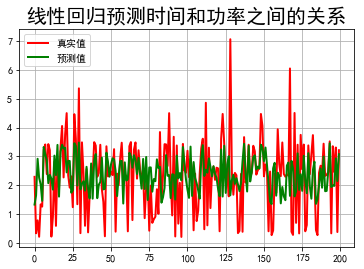

In [57]:
## 预测值和实际值画图比较
t=np.arange(len(X_test))#把x转化为位置点t
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, Y_test, 'r-', linewidth=2, label='真实值') #画出t 和 y测试集 用红色线连接
plt.plot(t, y_predict, 'g-', linewidth=2, label='预测值')# 画出t 和 y预测集 用绿色线连接
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("线性回归预测时间和功率之间的关系", fontsize=20)#添加标题
plt.grid(b=True)#加网格
plt.show()#显示图像

电流预测准确率:  0.9920420609708968
电流参数: [5.07744316 0.07191391]


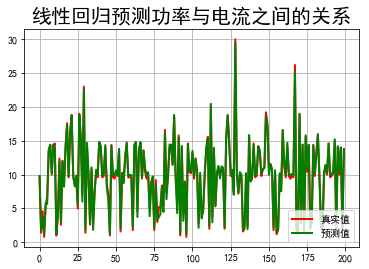

In [58]:
## 功率和电流之间的关系
X = datas.iloc[:,2:4]
Y2 = datas.iloc[:,5]

## 数据分割
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=0)

## 数据归一化
scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train) # 训练并转换
X2_test = scaler2.transform(X2_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

## 模型训练
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train) ## 训练模型

## 结果预测
Y2_predict = lr2.predict(X2_test)

## 模型评估
print("电流预测准确率: ", lr2.score(X2_test,Y2_test))
print("电流参数:", lr2.coef_)

## 绘制图表
#### 电流关系
t=np.arange(len(X2_test))
plt.figure(facecolor='w')
plt.plot(t, Y2_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, Y2_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测功率与电流之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()

# 自己练习